In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


In [71]:
mib_fb = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016.csv',sep=';')

In [72]:
mib_fb

,﻿ord,post_type,by,post_message,picture,link,link_domain,post_published,post_published_unix,post_published_sql,...,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement,post_id,post_link
0,1,photo,post_page_171645503710,#Buongiorno da Palazzo Reale #Genova. _Il più...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-17T08:14:39+0000,1463472879,17/05/2016 10:14,...,484,9,9,7,2,91,2,581,171645503710_10154226152418711,https://www.facebook.com/MIBACT/posts/10154226...
1,2,photo,post_page_171645503710,Buon #compleanno al Teatro La Fenice che venne...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/LaFeniceufficiale/pho...,facebook.com,2016-05-16T09:26:22+0000,1463390782,16/05/2016 11:26,...,969,11,10,9,1,0,7,978,171645503710_10154224061308711,https://www.facebook.com/MIBACT/posts/10154224...
2,3,photo,post_page_171645503710,#Buongiorno dall_antica città di Elea-Velia #S...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-16T07:54:03+0000,1463385243,16/05/2016 09:54,...,1477,62,61,40,21,651,85,2262,171645503710_10154223947508711,https://www.facebook.com/MIBACT/posts/10154223...
3,4,photo,post_page_171645503710,A Chiusi (SI) dal 29 luglio al 7 agosto sarà #...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-14T11:55:18+0000,1463226918,14/05/2016 13:55,...,88,4,4,4,0,55,8,153,171645503710_10154219764573711,https://www.facebook.com/MIBACT/posts/10154219...
4,5,photo,post_page_171645503710,Inaugura oggi la mostra “Igor Mitoraj a #Pompe...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.19065...,facebook.com,2016-05-14T07:03:01+0000,1463209381,14/05/2016 09:03,...,1338,50,49,36,13,442,36,1857,171645503710_10154218603568711,https://www.facebook.com/MIBACT/posts/10154218...
5,6,photo,post_page_171645503710,RITROVATE! Le tele trafugate dal museo di Cast...,https://scontent.xx.fbcdn.net/v/l/t1.0-0/s130x...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-13T14:18:50+0000,1463149130,13/05/2016 16:18,...,1129,23,23,15,8,284,29,1452,171645503710_10154217858493711,https://www.facebook.com/MIBACT/posts/10154217...
6,7,photo,post_page_171645503710,#Buongiorno dal Museo Nazionale Etrusco di Vit...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.19065...,facebook.com,2016-05-13T07:33:05+0000,1463124785,13/05/2016 09:33,...,290,4,4,4,0,79,2,374,171645503710_10154217223208711,https://www.facebook.com/MIBACT/posts/10154217...
7,8,photo,post_page_171645503710,Buon #Compleanno Vanvitelli! Nato Lodewijk va...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-12T14:52:37+0000,1463064757,12/05/2016 16:52,...,2102,34,34,22,12,685,46,2860,171645503710_10154215718423711,https://www.facebook.com/MIBACT/posts/10154215...
8,9,photo,post_page_171645503710,Fino al 16 maggio la 29ma edizione del Salone ...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.19065...,facebook.com,2016-05-12T13:55:50+0000,1463061350,12/05/2016 15:55,...,48,0,0,0,0,11,0,59,171645503710_10154215640573711,https://www.facebook.com/MIBACT/posts/10154215...
9,10,photo,post_page_171645503710,#Buongiorno da Palazzo Lanfranchi_ #Matera Mas...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.19065...,facebook.com,2016-05-12T09:00:42+0000,1463043642,12/05/2016 11:00,...,341,12,12,6,6,74,9,432,171645503710_10154215221148711,https://www.facebook.com/MIBACT/posts/10154215...


# Cerchiamo di capire la concentrazione dei valori e la distribuzione degli outliers

In [60]:
engage = mib_fb['engagement']

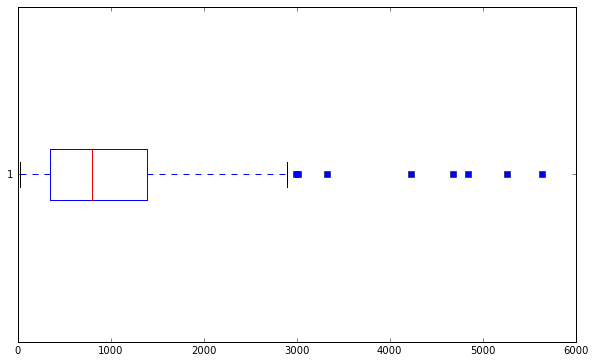

In [61]:
engage_boxplt = plt.boxplot(engage, 0, 'rs', 0)

**Il boxplot evidenzia un gran numero di outliers nei dati di engagement**

**E evidente che non siamo in presenza di una "distribuzione normale"**

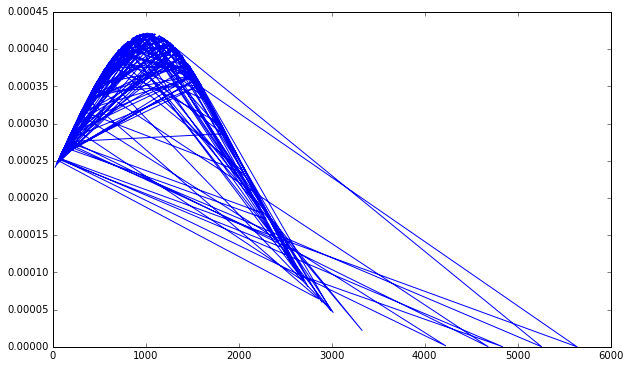

In [101]:
#Proviamo a rappresentare una gaussiana con i dati di engagement
mib_fb_media = np.mean(engage)
mib_fb_std = np.std(engage)
pdf = stats.norm.pdf(engage, mib_fb_media, mib_fb_std)
plt.plot(engage, pdf)

**No, decisamente una distribuzione "non normale"**

# E normalizzando i dati?

In [62]:
engage.mean()

1025.2723004694835

In [63]:
engage.std()

949.0212589984502

In [73]:
colonne = mib_fb.columns
colonne

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [21]:
#mib_fb['post_published']

# Retrieve rows

In [74]:
mib_fb.head(2)

,﻿ord,post_type,by,post_message,picture,link,link_domain,post_published,post_published_unix,post_published_sql,...,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement,post_id,post_link
0,1,photo,post_page_171645503710,#Buongiorno da Palazzo Reale #Genova. _Il più...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/MIBACT/photos/a.10151...,facebook.com,2016-05-17T08:14:39+0000,1463472879,17/05/2016 10:14,...,484,9,9,7,2,91,2,581,171645503710_10154226152418711,https://www.facebook.com/MIBACT/posts/10154226...
1,2,photo,post_page_171645503710,Buon #compleanno al Teatro La Fenice che venne...,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/LaFeniceufficiale/pho...,facebook.com,2016-05-16T09:26:22+0000,1463390782,16/05/2016 11:26,...,969,11,10,9,1,0,7,978,171645503710_10154224061308711,https://www.facebook.com/MIBACT/posts/10154224...


# DataFrame columns

In [78]:
DataFrame(mib_fb,columns=['post_type','post_published','likes','engagement'])

,post_type,post_published,likes,engagement
0,photo,2016-05-17T08:14:39+0000,479,581
1,photo,2016-05-16T09:26:22+0000,961,978
2,photo,2016-05-16T07:54:03+0000,1465,2262
3,photo,2016-05-14T11:55:18+0000,86,153
4,photo,2016-05-14T07:03:01+0000,1330,1857
5,photo,2016-05-13T14:18:50+0000,1116,1452
6,photo,2016-05-13T07:33:05+0000,289,374
7,photo,2016-05-12T14:52:37+0000,2095,2860
8,photo,2016-05-12T13:55:50+0000,48,59
9,photo,2016-05-12T09:00:42+0000,337,432


In [80]:
mib_index = mib_fb.index
mib_index

RangeIndex(start=0, stop=213, step=1)

# Contiamo le tipologie di post più utilizzate

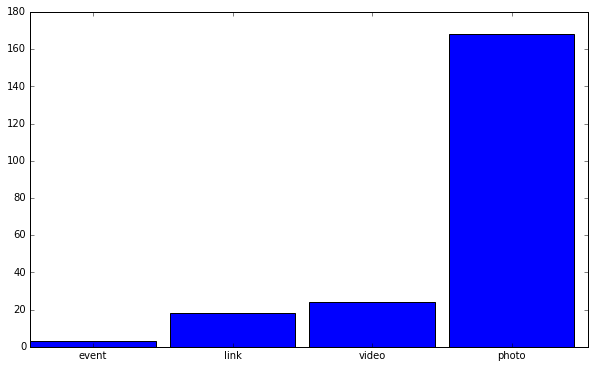

In [98]:
counter = Counter(mib_fb['post_type'])
mib_fb_ptype = counter.keys()
mib_fb_ptype_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(mib_fb_ptype))
width = 0.9
plt.bar(indexes, mib_fb_ptype_counts, width)
plt.xticks(indexes + width * 0.5, mib_fb_ptype)
plt.show()



In [95]:
counter

Counter({'event': 3, 'link': 18, 'photo': 168, 'video': 24})